## Importing Libraries

In [23]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

# Setting seaborn color palette
palette = sns.set_palette('dark')

In [19]:
file_path = "https://raw.githubusercontent.com/diogo-costa-silva/datasets/main/customer_acquisition_data.csv"
data = pd.read_csv(file_path)

## Overview of the Dataset
In this step, we will start by summarizing the dataset, including its size, column names, and any missing values. We will calculate basic statistics to gain an understanding of the dataset’s overall characteristics.

In [3]:
data

,customer_id,channel,cost,conversion_rate,revenue
0,1,referral,8.320327,0.123145,4199
1,2,paid advertising,30.450327,0.016341,3410
2,3,email marketing,5.246263,0.043822,3164
3,4,social media,9.546326,0.167592,1520
4,5,referral,8.320327,0.123145,2419
...,...,...,...,...,...
795,796,social media,9.546326,0.167592,2813
796,797,email marketing,5.246263,0.043822,3439
797,798,social media,9.546326,0.167592,2101
798,799,paid advertising,30.450327,0.016341,813


In [4]:
## What are the different colours?
data.columns

Index(['customer_id', 'channel', 'cost', 'conversion_rate', 'revenue'], dtype='object')

In [5]:
data.shape

(800, 5)

The dataset has 800 records and 5 columns.

In [6]:
unique_channels = data["channel"].unique()
unique_channels

array(['referral', 'paid advertising', 'email marketing', 'social media'],
      dtype=object)

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800 entries, 0 to 799
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   customer_id      800 non-null    int64  
 1   channel          800 non-null    object 
 2   cost             800 non-null    float64
 3   conversion_rate  800 non-null    float64
 4   revenue          800 non-null    int64  
dtypes: float64(2), int64(2), object(1)
memory usage: 31.4+ KB


From this information, we can gather the following:

- The dataset does not contain any missing values (all columns have 800 non-null values).
- The ‘customer_id’ column is a unique identifier for each customer and is stored as integers.
- The ‘channel’ column represents the acquisition channel through which customers were acquired, and it contains categorical data.
- The ‘cost’ column represents the acquisition cost for each customer, and it is stored as floating-point numbers.
- The ‘conversion_rate’ column represents the conversion rate for each customer, also stored as floating-point numbers.
- The ‘revenue’ column represents the revenue generated by each customer and is stored as integers.

In [8]:
data.describe()

,customer_id,cost,conversion_rate,revenue
count,800.0000,800.000000,800.000000,800.000000
mean,400.5000,13.148052,0.086305,2769.151250
std,231.0844,9.922337,0.059611,1259.543706
min,1.0000,5.246263,0.016341,500.000000
25%,200.7500,5.246263,0.043822,1694.000000
50%,400.5000,8.320327,0.043822,2764.000000
75%,600.2500,9.546326,0.123145,3824.250000
max,800.0000,30.450327,0.167592,4998.000000


After reading and loading the dataset, we computed basic statistics for the numeric columns: ‘cost’, ‘conversion_rate’, and ‘revenue’. These basic statistics give us a preliminary understanding of the dataset’s characteristics and serve as a starting point for further exploration and analysis.

### Distribution of Numeric Variables
We will examine the distributions of numeric variables, such as ‘cost’, and ‘revenue’. By visualizing these distributions, we can determine their shapes, ranges, and identify any outliers.



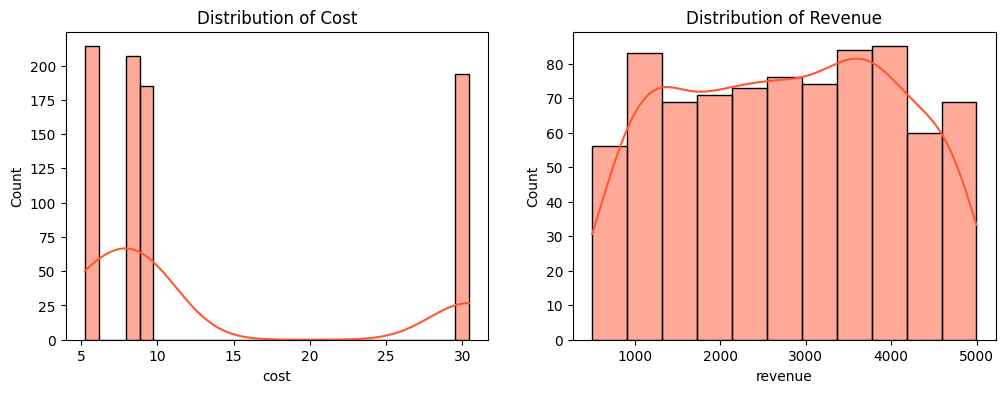

In [22]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))
ax1.set_title('Distribution of Cost')
sns.histplot(data, x='cost', kde=True, ax=ax1)
ax2.set_title('Distribution of Revenue')
sns.histplot(data, x='revenue', kde=True, ax=ax2);

We can see that the ‘cost’ variable contains 4 unique values and has a relatively balanced distribution around an average value of 200, with moderate variability.

As for the ‘revenue’ variable, it has been categorized into 11 bins. From it’s histogram, we can conclude that this variable has a relatively narrow range and moderate variability (most observations clustered around the mean).

### Distribution of Categorical Variables
To understand the distribution of the categorical variable ‘channel’, we will create a visual representation, such as bar chart. This will allow us to observe the proportions of customers acquired through different channels, identify the most common and least common channels, and assess the balance of the data.

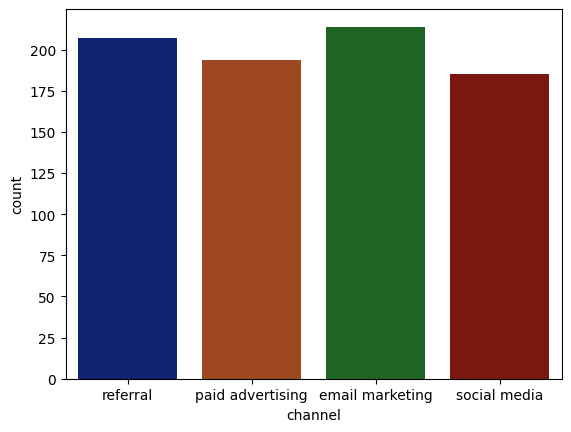

In [24]:
sns.countplot(data, x='channel');

The counts for each channel appear to be relatively close to each other. This suggests that the customer acquisition efforts were distributed somewhat evenly across these channels.

### Grouping and Aggregating Data
Aggregating the data allows us to calculate summary statistics and gain insights into the average performance of different groups.

We can aggregate the data by the acquisition channel to analyze the performance of each channel. For example, we can calculate the average ‘cost’, ‘conversion_rate’, and ‘revenue’ for each channel to understand which channels are most effective.

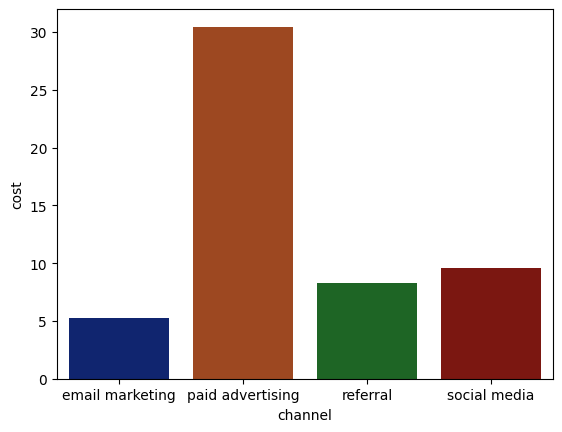

In [25]:
# Grouping the data based on 'channel'
channel_groups = data.groupby('channel')
# Aggregating 'cost' for each channel group
cost_by_channel = channel_groups['cost'].mean().reset_index()

sns.barplot(cost_by_channel, x='channel', y='cost');

From this analysis, we can observe that paid advertising has the highest average cost. On the other hand, social media, email marketing and referrals have relatively lower average costs.

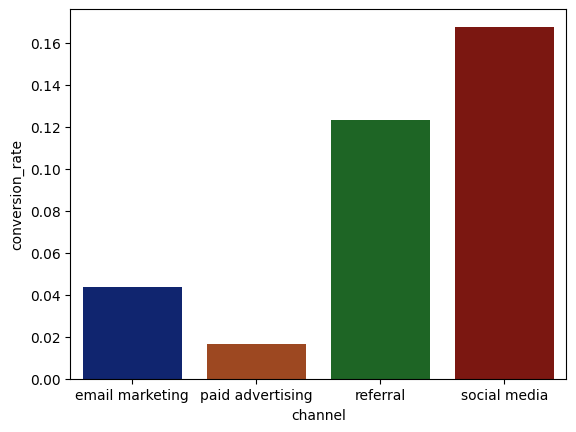

In [26]:
# Aggregating 'conversion_rate' for each channel group
conversion_rate_by_channel = channel_groups['conversion_rate'].mean().reset_index()

sns.barplot(conversion_rate_by_channel, x='channel', y='conversion_rate');

Social media has the highest average conversion rate, indicating that it may be a more successful channel for acquiring customers who convert into revenue. Referral also has relatively high conversion rate. Paid advertising and email marketing have the lowest average conversion rates, implying that they may require further optimization or targeting strategies to improve conversion rates.

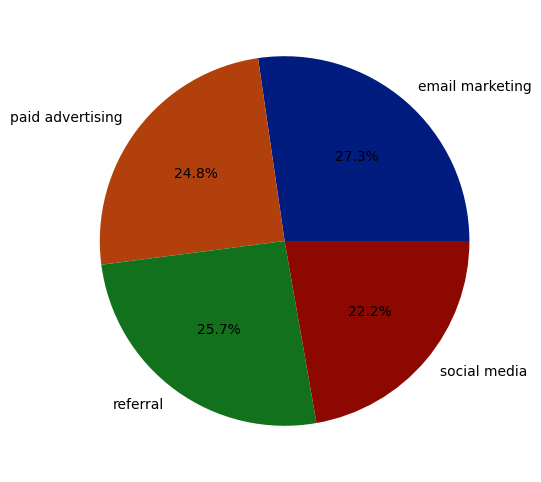

In [27]:
# Aggregating 'revenue' for each channel group
revenue_by_channel = channel_groups['revenue'].sum().reset_index()

fig, ax = plt.subplots(figsize=(8, 6))
plt.pie(revenue_by_channel['revenue'], labels=revenue_by_channel['channel'], autopct='%1.1f%%');

The aggregation result suggests that each channel plays a significant role in generating revenue, with email marketing being the highest contributor. It implies that allocating resources and focusing efforts on these channels may be beneficial for maximizing revenue generation.

## Return on Investment (ROI)
Return on Investment (ROI) is a financial metric used to evaluate the profitability and efficiency of an investment. It measures the return or gain generated from an investment relative to its cost.

In [28]:
data['roi'] = (data['revenue'] - data['cost']) / data['cost']

data.head()

,customer_id,channel,cost,conversion_rate,revenue,roi
0,1,referral,8.320327,0.123145,4199,503.667681
1,2,paid advertising,30.450327,0.016341,3410,110.985660
2,3,email marketing,5.246263,0.043822,3164,602.095925
3,4,social media,9.546326,0.167592,1520,158.223564
4,5,referral,8.320327,0.123145,2419,289.733775


### ROI by Channel Analysis
Now let’s perform ROI by Channel Analysis which will allow us to assess the profitability of investments made through different acquisition channels.

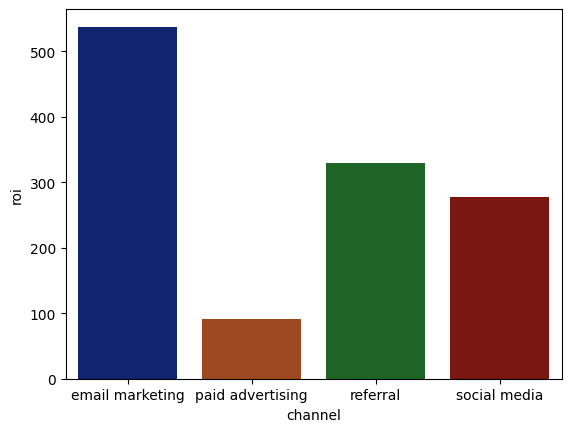

In [29]:
roi_by_channel = data.groupby('channel')['roi'].mean().reset_index()

sns.barplot(roi_by_channel, x='channel', y='roi');

Based on the analysis, email marketing appears to be the most effective channel in terms of generating returns, followed by referral and social media. Paid advertising, on the other hand, seems to have a lower ROI compared to the other channels.

### ROI and Other Variables Analysis
Performing ROI and other variables analysis can provide valuable insights into the relationship between profitability and various factors such as conversion rates, costs, and revenue.

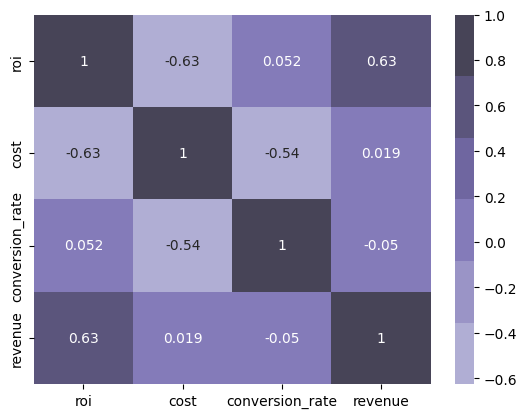

In [30]:
# Computing the correlation matrix
corr = data[['roi', 'cost', 'conversion_rate', 'revenue']].corr()

sns.heatmap(corr, annot=True, cmap=sns.color_palette('Purples_d'));

The correlation matrix suggests that cost and revenue have the strongest relationships with ROI. Higher costs are associated with lower ROI, while higher revenue is associated with higher ROI. The conversion rate alone does not show a significant correlation with ROI.

## Customer Lifetime Value (CLTV)
CLTV (Customer Lifetime Value) analysis is a method used by businesses to estimate the total value a customer will generate over the entire duration of their relationship with the company. It is a valuable metric that helps businesses understand the long-term profitability and worth of their customer base.

In [31]:
data['cltv'] = (data['revenue'] - data['cost']) * data['conversion_rate'] / data['cost']
data.head()

,customer_id,channel,cost,conversion_rate,revenue,roi,cltv
0,1,referral,8.320327,0.123145,4199,503.667681,62.024146
1,2,paid advertising,30.450327,0.016341,3410,110.985660,1.813671
2,3,email marketing,5.246263,0.043822,3164,602.095925,26.385185
3,4,social media,9.546326,0.167592,1520,158.223564,26.517043
4,5,referral,8.320327,0.123145,2419,289.733775,35.679260


### CLTV by Channel
Calculating CLTV by channel allows us to assess the long-term value of customers acquired through different marketing channels.

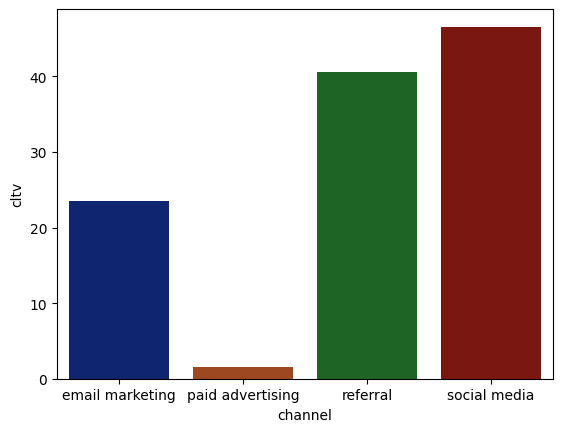

In [32]:
cltv_by_channel = data.groupby('channel')['cltv'].mean().reset_index()

sns.barplot(cltv_by_channel, x='channel', y='cltv');

Based on the analysis, referral and social media channels stand out as the most effective in terms of generating higher customer lifetime value (CLTV). Email marketing also performs reasonably well, while paid advertising lags behind in terms of CLTV.

Now let’s compare the CLTV of the referral and social media channels to get additional insights.

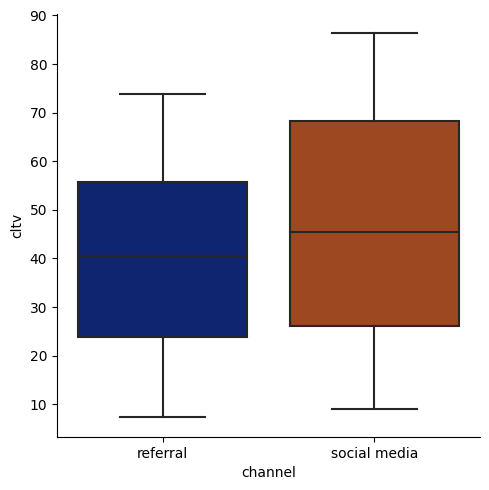

In [33]:
# Selecting records where channel is referral or social media
select = data[data['channel'].isin(['referral', 'social media'])]

sns.catplot(select, x='channel', y='cltv', kind='box');

We can see that the social media channel performs the best, but the referral channel is not much worse.


## Summary
In this data analysis project, we explored the concept of Customer Lifetime Value (CLTV) and its relationship to various marketing channels.

EDA was performed to gain insights into the distribution and characteristics of the data. Various visualizations, such as histograms, bar charts, pie and box plots, heatmap were used to analyze the distribution of variables, identify patterns, and understand relationships between variables.

Aggregations, such as calculating the average cost and conversion rate, total revenue for each channel, provided an overview of how different channels contribute to overall results.

The Return on Investment (ROI) analysis helped assess the profitability and effectiveness of each channel in generating revenue.

We estimated the Customer Lifetime Value (CLTV) for each channel to understand the long-term value generated by customers acquired through different channels.

The analysis provided valuable insights which can guide resource allocation, marketing strategies, and channel optimization efforts to maximize long-term customer value and business success.